# Pipeline 3.1: 
#### _IQR -> Normalization -> Z Score_
_Locked Up_ - Bridget Weill - Fairfield University - MSBA Capstone Project

------------------

### Import Data & Packages

In [1]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from scipy.stats import boxcox
from scipy import stats

In [2]:
data_cat_enc = pd.read_csv('data_cat_enc.csv')

In [3]:
datacont = pd.read_csv('datacont.csv')

In [4]:
target = pd.read_csv('target.csv')

## __IQR__

The interquartile range (IQR) measures the variabililty and spread of a dataset. It is calculated as the difference between the upper and lower quartile values in a set of data. The interquartile range is used to determine and handle outliers.
- A loop is created to find and replace the numbers outside the upper and lower bounds. IQR determines these upper and lower bounds through the following formulas:
    - UpperBound = Q3 + (1.5 * (Q3 - Q1))
    - LowerBound = Q1 - (1.5 * (Q3 - Q1))
- Next, the loop will replace the data outside of these bounds with the IQR
    - If the value is > UpperBound, it will be replaced with the UpperBound value
    - If the value is < LowerBound, it will be replaced with the LowerBound value
- A box plot can be used to check the results, there should be no black dotted outliers on the plot anymore

__Upper Bound:__

In [5]:
for col in datacont.columns:
    u_bound = datacont[col].quantile(0.75) + (1.5*(datacont[col].quantile(0.75)-datacont[col].quantile(0.25)))
    datacont[col][datacont[col] > u_bound] = u_bound

__Lower Bound:__

In [6]:
for col in datacont.columns:
    l_bound = datacont[col].quantile(0.25) - (1.5*(datacont[col].quantile(0.75)-datacont[col].quantile(0.25)))
    datacont[col][datacont[col] < l_bound] = l_bound

__Visualize the Results in a Boxplot:__

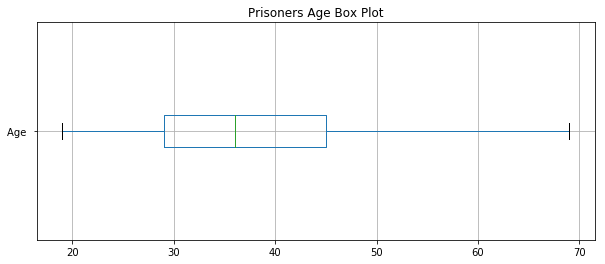

In [7]:
datacont.boxplot(vert=False, figsize=(10,4))
plt.title('Prisoners Age Box Plot')
plt.show()

In [8]:
datacont.describe()

,Age
count,3474.000000
mean,37.637594
std,10.621118
min,19.000000
25%,29.000000
50%,36.000000
75%,45.000000
max,69.000000


- As seen in the box plot, the outliers have been removed from the dataset by using the IQR ratios
- By looking further into the results using '.describe()', it shows that both the min remains at 19, while the max was altered to 69 
- Overall this did not alter too many values or make too many changes, the mean was only decreased by around .03

### __Normalization__

Normalizing the skewness of the data makes it more symmetric. With symmetric data, the mean, median & mode will be equal, if not, the data is either positively or negatively skewed.
- *Symmetrical*: skewness between -0.5 and 0.5 (closer to 0 the better)
- *Moderately Skewed*: skewness between -1 and -0.5 or 0.5 and 1
- *Highly Skewed*: skewness less than -1 or greater than 1

__Convert:__

*Positively Skewed*: square root, cube root, log, 1/x

*Negatively Skewed*: square, cubic, exponential

- Scipy Features:
   - Yeojohnson & boxcox are used to normalize the data
   - To use boxcox, all numbers in the column must be positive, if not, use stats.yeojohnson
   - Note: add [0] to output 1 column without adding the lambda column
   - After using Yeojohnson or boxcox, confirm the skewness through .skew().
       - If any values are not between -0.5 and 0.5, use the conversions above to complete the normalization

In [9]:
datacont.skew()

Age     0.588978
dtype: float64

In [10]:
datacont['AgeSkew'] = stats.yeojohnson(datacont['Age '])[0]

In [11]:
data_cont_norm = datacont.drop(['Age '], axis=1)

In [12]:
data_cont_norm.skew()

AgeSkew    0.004867
dtype: float64

__Visualize the Results through Histograms__

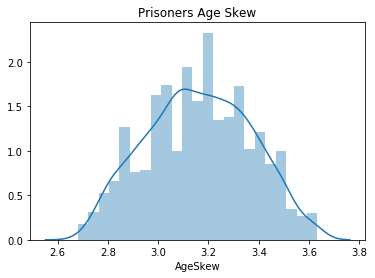

In [13]:
sns.distplot(data_cont_norm["AgeSkew"])
plt.title('Prisoners Age Skew')
plt.show()

## __Z Score__

The Z Score is used to scale and transform the data: 
- Large outliers are minimized by transforming the data to the ZScore
- A box plot can be used to check the results, the range should not be as signifigant as it was prior to scaling

In [14]:
# create scaler
scaler = StandardScaler()

# fit and transform in one step
data_cont_norm = scaler.fit_transform(data_cont_norm)
data_cont_transform = pd.DataFrame(data_cont_norm)

_Rename the columns back after the transformation_

In [15]:
data_cont_transform.columns=['AgeSkew']

In [16]:
data_cont_transform.head()

,AgeSkew
0,0.536586
1,1.357340
2,-0.324536
3,-0.549335
4,0.450992


__Analyze the Results:__

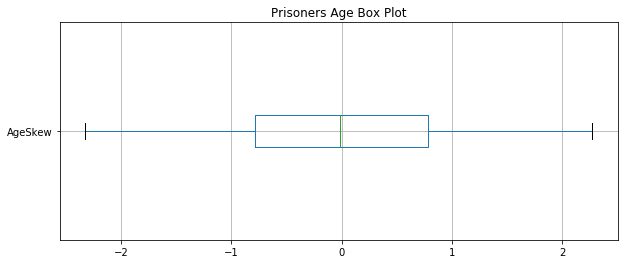

In [17]:
data_cont_transform.boxplot(vert=False, figsize=(10,4))
plt.title('Prisoners Age Box Plot')
plt.show()

In [18]:
data_cont_transform.describe()

,AgeSkew
count,3.474000e+03
mean,1.268096e-16
std,1.000144e+00
min,-2.327571e+00
25%,-7.897827e-01
50%,-1.271179e-02
75%,7.810680e-01
max,2.275332e+00


## Correlation

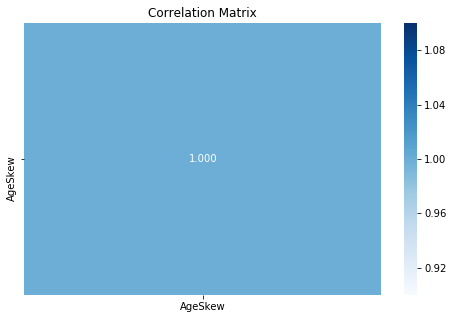

In [19]:
corr = data_cont_transform.corr()
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corr, annot=True, fmt=".3f", cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

- Since there is only 1 continuous value, there is no correlation with other variables

__Final DataFrame__

- Connect all 3 dataframes back together and save them as a csv

In [20]:
pipeline3_1 = pd.concat([data_cont_transform,data_cat_enc,target], axis=1)
pipeline3_1.head()

,AgeSkew,Sex_Female,Sex_Male,"Race_American Indian, Alaska Native non-Hispanic","Race_Asian, Pacific Islander, Native Hawaiian non-Hispanic",Race_Black non-Hispanic,Race_Hispanic,"Race_Multiple races, non-Hispanic",Race_White non-Hispanic,USCitizen_Not a US Citizen,...,Income_800-999,Income_No income,Weapons_Blunt object,Weapons_Firearm,Weapons_Knife,Weapons_None,Weapons_Other,Weapons_Other sharp object,Weapons_Toy or bb gun,CriminalHistoryEnc
0,0.536586,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,1.357340,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,-0.324536,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,-0.549335,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.450992,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [21]:
pipeline3_1.to_csv('../BUAN6590-Capstone-BridgetWeill/pipeline3_1.csv', index=0)